<a href="https://colab.research.google.com/github/Meeta49/Fake-social-media-account/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FAKE SOCIAL MEDIA ACCOUNT DETECTION

Detected Target Column: fake

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Accuracy: 0.9130434782608695

Validation Accuracy: 0.8620689655172413

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        63
           1       0.93      0.75      0.83        53

    accuracy                           0.86       116
   macro avg       0.88      0.85      0.86       116
weighted avg       0.87      0.86      0.86       116



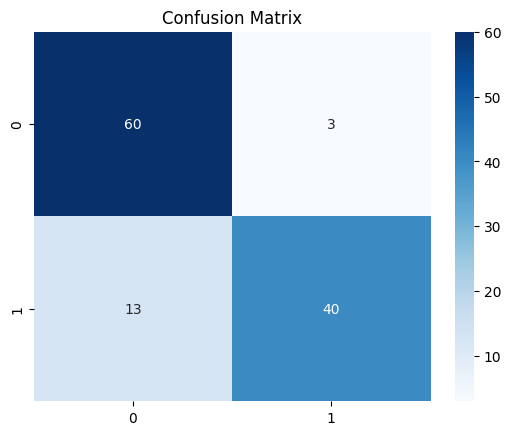

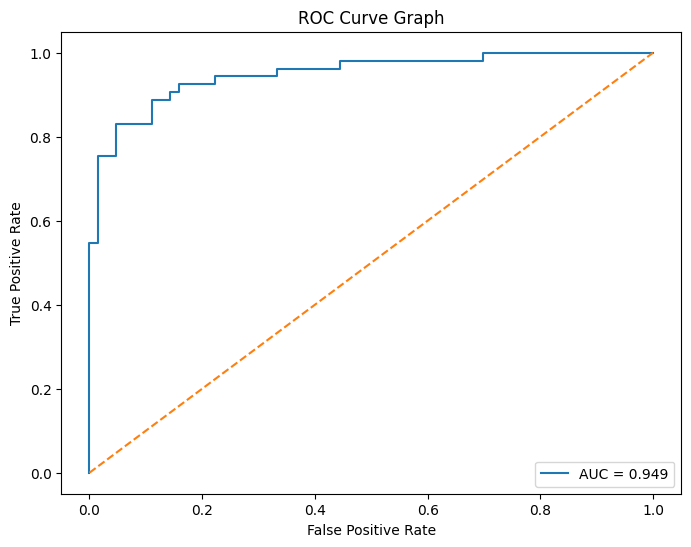


Test Predictions:
[1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 1 1]

Saved as final_predictions.csv


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Load datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train = train.dropna()

# Auto detect target column (last column)
target_col = train.columns[-1]
print("Detected Target Column:", target_col)

# Feature and target split
X = train.drop(target_col, axis=1)
y = train[target_col]

# Align test columns with train features
test = test[X.columns]

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_scaled = scaler.transform(test)

# GridSearchCV Hyperparameter optimization
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear"]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

best_model = grid.best_estimator_

# Predict validation data
y_pred = best_model.predict(X_val)

print("\nValidation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC curve
y_prob = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="AUC = %.3f" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve Graph")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Final test predictions
test_predictions = best_model.predict(test_scaled)
print("\nTest Predictions:")
print(test_predictions)

pd.DataFrame({"Prediction": test_predictions}).to_csv("final_predictions.csv", index=False)
print("\nSaved as final_predictions.csv")


In [ ]:
# Final test predictions
test_predictions = best_model.predict(test_scaled)
print("\nRaw Test Predictions:")
print(test_predictions)

# Convert numerical prediction to Fake / Real
result_labels = ["Fake Account" if val == 1 else "Real Account" for val in test_predictions]

print("\nFake Social Media Account Detection Results:")
print(result_labels)

# Save output file
output_df = pd.DataFrame({
    "Prediction": test_predictions,
    "Account_Status": result_labels
})

output_df.to_csv("final_predictions.csv", index=False)
print("\nSaved as final_predictions.csv")

# Show value counts
print("\nCount of Fake vs Real Accounts:")
print(output_df["Account_Status"].value_counts())



Raw Test Predictions:
[1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 1 1]

Fake Social Media Account Detection Results:
['Fake Account', 'Real Account', 'Real Account', 'Real Account', 'Fake Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Fake Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Fake Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Fake Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Fake Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account', 'Real Account